In [39]:
# GAUSS-SEIDEL's Iterative Method - CaptainOrb

# This imports everything from numpy
from numpy import *

def isDiagonallyDominant(A):
    length = len(A)

    for i in range(length):
        pivot = 0
        non_pivot = 0
        
        for j in range(length):
            if i==j: pivot = abs(A[i][j])
            else: non_pivot += abs(A[i][j])
        
        # if the pivot is not dominant
        if pivot < non_pivot:
            return False
    
    # if all pivot elements are dominant
    return True

def gaussSeidel(A, B, X, epsilon):
    length = len(A)
    
    # keep the values of X before iteration
    X_old = X.copy()
    
    # iterate all rows
    for j in range(0, length):
        b = B[j]
        # subtract b with all other entry
        for i in range(0, length):
            if (j != i): b -= A[j][i]*X[i]
        # update value of x
        X[j] = b/A[j][j]
        
    print(X)
        
    # calculate the error
    for j in range(0, length):
        # if the error exceeds tolerance
        error = abs((X[j] - X_old[j])/X[j])
        print("Error:", error)
        if error > epsilon:
            return gaussSeidel(A, B, X, epsilon)
    
    # if the error satisfied tolerance
    print("Converged X:", X)


# USE THE GAUSS SEIDEL!

# Given: (with known correct answer of x = [-1, 2, -3])
A = [[3, -2, 1],
    [1, -3, 2],
    [1, -2, 3]]
B = [-10,
     -13,
     -14]

# Let:
X = [0, 0, 0]
epsilon = 0.01

# Start
if (isDiagonallyDominant(A)):
    gaussSeidel(A, B, X, epsilon)
else:
    print("Not diagonally dominant!")

[-3.3333333333333335, 3.222222222222222, -1.4074074074074074]
Error: 1.0
[-0.7160493827160496, 3.156378600823045, -2.3237311385459534]
Error: 3.6551724137931028
[-0.45450388660265206, 2.632677945435147, -2.7600467408423515]
Error: 0.575452716297787
[-0.6581991227624514, 2.2739024651842823, -2.9313319822896617]
Error: 0.3094735758760869
[-0.8402876957805913, 2.099016113213362, -2.9872266925975617]
Error: 0.21669789279609453
[-0.9382470269919048, 2.029099862604324, -3.0011844159331496]
Error: 0.10440675898049896
[-0.9802052862860675, 2.005808627282544, -3.002725819716281]
Error: 0.042805583566213765
[-0.9952189752395436, 1.9997764617759648, -3.001742700402842]
Error: 0.015085814606642111
[-0.9995681253484094, 1.9989821579486355, -3.0008225195847733]
Error: 0.004351029208089133
Error: 0.0003973541355388459
Error: 0.0003066428661019574
Converged X: [-0.9995681253484094, 1.9989821579486355, -3.0008225195847733]


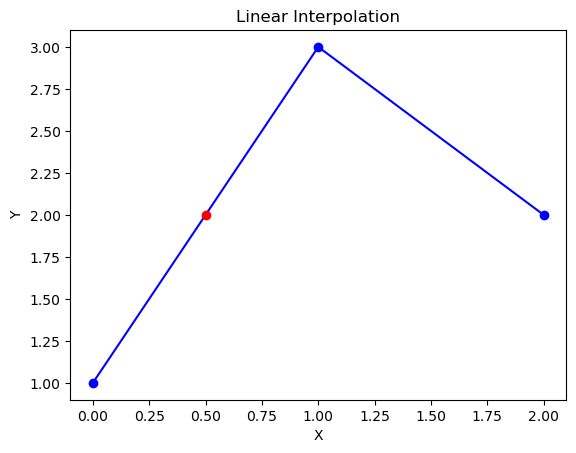

In [40]:
# LINEAR INTERPOLATION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

f = interp1d(x, y)
x_target = 0.5

plt.title("Linear Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "-ob") # create blue line with dots
plt.plot(x_target, f(x_target), "or") # create red dot

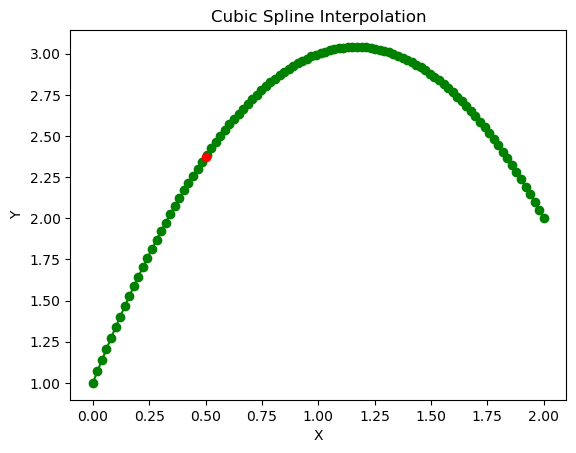

In [41]:
# CUBIC SPLINE INTERPOLATION - CaptainOrb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

f = CubicSpline(x, y)
x_target = 0.5

# split x into 100 connected dots from 0 to 2
x_dotted = np.linspace(0, 2, 100)
y_dotted = f(x_dotted)

plt.title("Cubic Spline Interpolation")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_dotted, y_dotted, "-og") # create green line with dots
plt.plot(x_target, f(x_target),  "or") # create red dot

[[ 3]
 [ 4]
 [ 8]
 [ 9]
 [ 5]
 [10]
 [ 1]
 [ 2]]


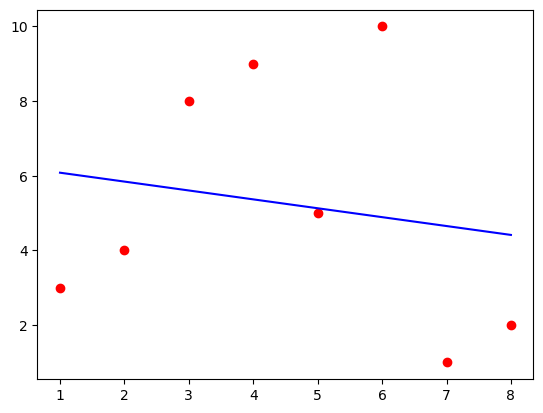

In [42]:
# LEAST SQUARE REGRESSION - CaptainOrb
import numpy as np

# Reference:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html
# help(np.linalg.lstsq)

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([3, 4, 8, 9, 5, 10, 1, 2])

# make A become tuplets of (x, 1), then transpose
A = np.vstack((x, np.ones(len(x)))).T

# np.newaxis adds new dimension to y
# thus, the shape of y_new will be (len(y), 1)
y_new = y[:, np.newaxis]
print(y_new)

# pinv = (AT A)^-1 * AT
# beta = pinv * Y
pinv = np.linalg.pinv(A)
beta = np.dot(pinv, y_new)

# beta[0] = m, beta[1] = c
# f = mx + c
f = beta[0]*x + beta[1]

plt.plot(x, y, "or") # create actual red dots
plt.plot(x, f, "-b") # create blue regression line

In [43]:
# Root Finding - Bisection Method
import numpy as np

def f(x):
    return x**2 - 6

def bisection_method(x1, x2, tolerance = 0.001):
    if(np.sign(f(x1)) == np.sign(f(x2))):
        print("Invalid Coordinate")
        return

    x_new = (x1+x2)/2
    
    if (np.abs(f(x_new)) <= tolerance):
        print("Root is ", x_new)

    elif (np.sign(f(x_new)) == np.sign(f(x1))):
        bisection_method(x_new, x2)
    
    elif (np.sign(f(x_new)) == np.sign(f(x2))):
        bisection_method(x1, x_new)

# initial guess
bisection_method(2, 3)

Root is  2.449462890625


In [44]:
# Root Finding - Newton Raphson
import numpy as np

def f(x):
    return x**2 - 6

# g(x) is the first derivative of f(x)
def g(x):
    return 2*x

def newton_raphson(x0, tolerance = 0.001):
    x1 = x0 - (f(x0)/g(x0))
    if (np.abs(f(x1)) <= tolerance):
        print("Root is ", x1)
    else:
        newton_raphson(x1)

# initial guess
newton_raphson(30)

Root is  2.449628134937141
